In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

#reading data into dataframes
bc = pd.read_csv("/content/ETH-USD.csv", index_col=0, parse_dates=True)
usd = pd.read_csv("/content/US Dollar Index Futures Historical Data.csv", index_col=0, parse_dates=True)

In [ ]:
bc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
...,...,...,...,...,...,...
2022-05-26,1945.033325,1962.171143,1759.199585,1803.913330,1803.913330,2.345868e+10
2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,2.547076e+10
2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,2.321478e+10


In [ ]:
usd

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-05-30,101.455,101.713,101.722,101.362,-,-0.24%
2022-05-27,101.698,101.750,101.955,101.455,16.94K,-0.16%
2022-05-26,101.858,102.100,102.290,101.760,13.82K,-0.21%
2022-05-25,102.077,101.760,102.470,101.750,22.75K,0.20%
2022-05-24,101.870,102.145,102.335,101.655,28.49K,-0.22%
...,...,...,...,...,...,...
2017-05-08,98.936,98.370,99.055,98.355,29.51K,0.41%
2017-05-05,98.528,98.630,98.895,98.410,24.98K,-0.12%
2017-05-04,98.647,99.230,99.340,98.560,31.36K,-0.44%


In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1664 entries, 2017-11-09 to 2022-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1663 non-null   float64
 1   High       1663 non-null   float64
 2   Low        1663 non-null   float64
 3   Close      1663 non-null   float64
 4   Adj Close  1663 non-null   float64
 5   Volume     1663 non-null   float64
dtypes: float64(6)
memory usage: 91.0 KB


In [ ]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1312 entries, 2022-05-30 to 2017-05-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1312 non-null   float64
 1   Open      1312 non-null   float64
 2   High      1312 non-null   float64
 3   Low       1312 non-null   float64
 4   Vol.      1312 non-null   object 
 5   Change %  1312 non-null   object 
dtypes: float64(4), object(2)
memory usage: 71.8+ KB


In [ ]:
bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

,Close,Volume
Date,,
2022-05-26,1803.913330,2.345868e+10
2022-05-27,1724.922852,2.547076e+10
2022-05-28,1757.941772,2.321478e+10
2022-05-29,NaN,NaN
2022-05-30,1889.420288,1.491862e+10


In [ ]:
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Price
Date,
2022-05-30,101.455
2022-05-27,101.698
2022-05-26,101.858
2022-05-25,102.077
2022-05-24,101.870


In [ ]:
print(bc.shape)
print(usd.shape)

(1664, 2)
(1312, 1)


In [ ]:
bc.describe()

,Close,Volume
count,1663.000000,1.663000e+03
mean,1093.633214,1.268350e+10
std,1255.380748,1.114826e+10
min,84.308296,6.217330e+08
25%,199.517143,3.493892e+09
50%,406.657990,9.967343e+09
75%,1913.915894,1.806592e+10
max,4812.087402,8.448291e+10


In [ ]:
usd.describe()

,Price
count,1312.000000
mean,95.014755
std,3.082924
min,88.505000
25%,92.777250
50%,95.176000
75%,97.177750
max,104.897000


In [ ]:
join = bc
for x in join.index:
    for x2 in usd.index:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2017-11-09,320.884003,8.932500e+08,94.352
2017-11-10,299.252991,8.859860e+08,94.278
2017-11-11,314.681000,8.423010e+08,NaN
2017-11-12,307.907990,1.613480e+09,NaN
2017-11-13,316.716003,1.041890e+09,94.388


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c77ac0450>,
      dtype=object)

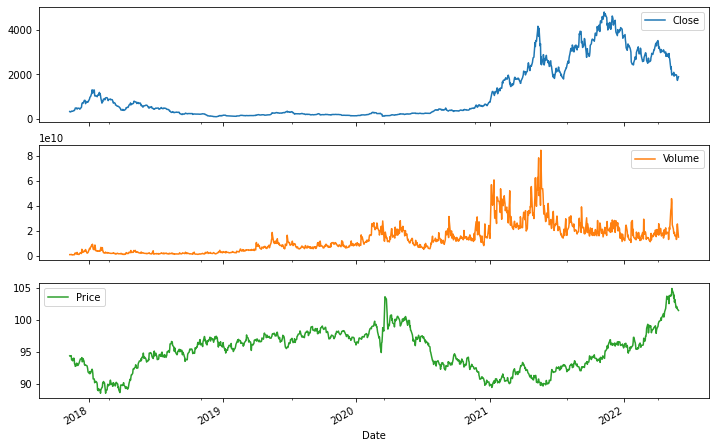

In [ ]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

In [ ]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [ ]:
series = join

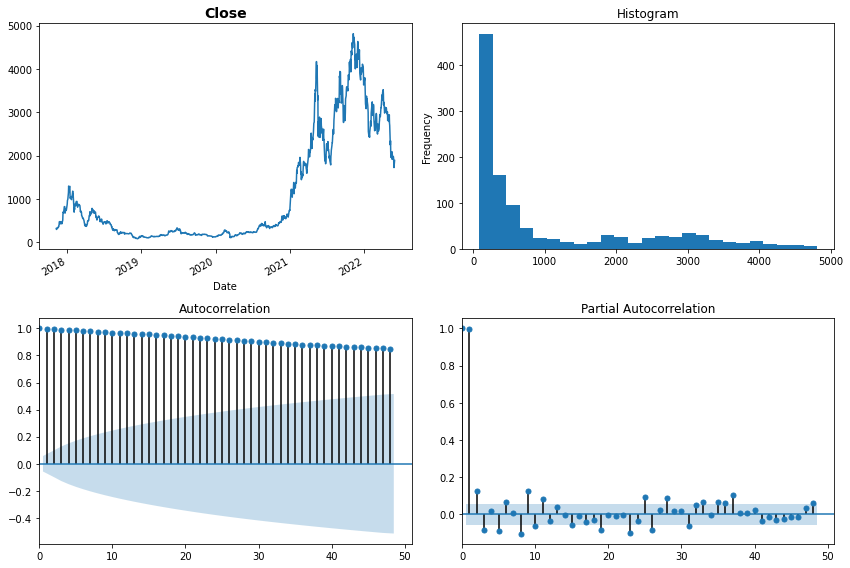

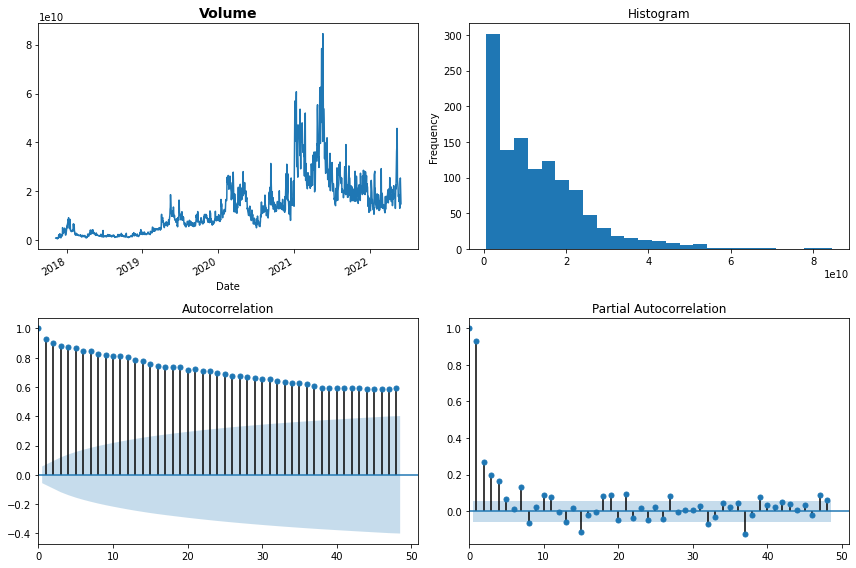

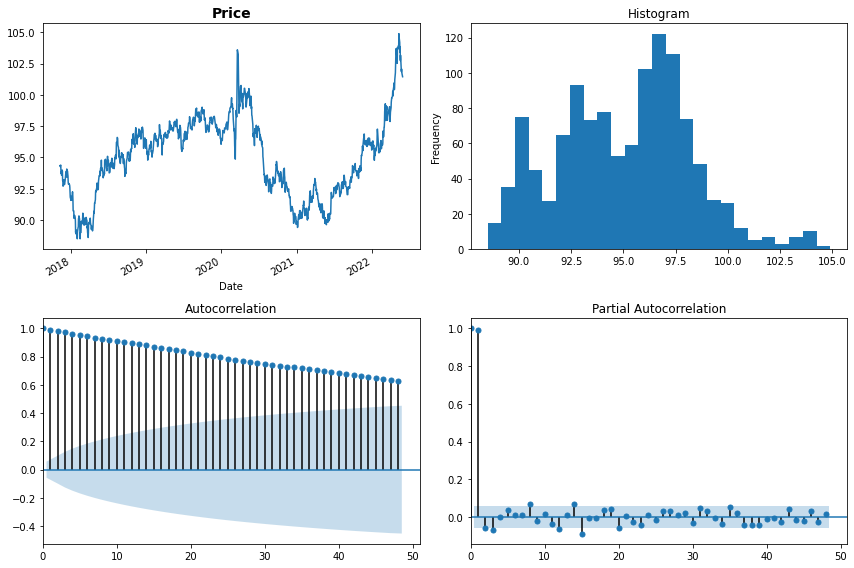

In [ ]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

,Close,Volume,Price
0,0.521306,0.565620,0.478828
1,0.425265,0.474234,0.267194
2,0.357692,0.389806,0.585852
3,0.423801,0.661221,0.465991
4,0.428909,0.411188,0.348102
...,...,...,...
1168,0.417765,0.436063,0.609861
1169,0.402651,0.590426,0.526716
1170,0.372896,0.675844,0.351513
1171,0.443951,0.371335,0.450263


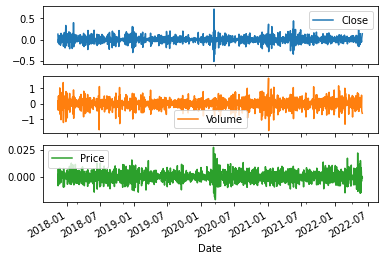

In [ ]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

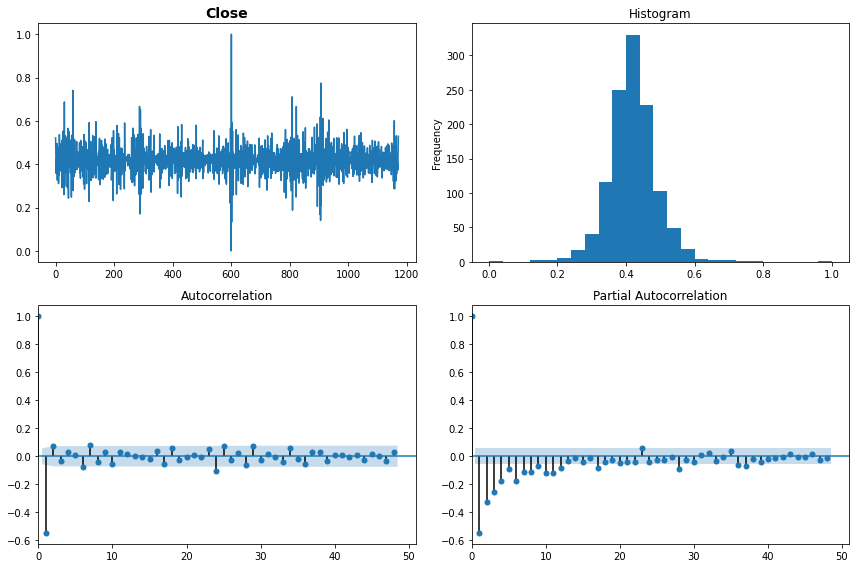

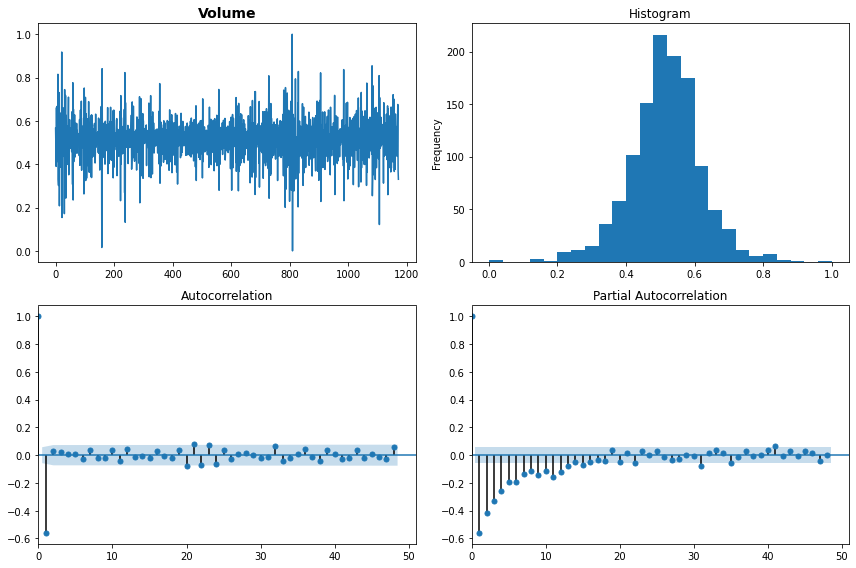

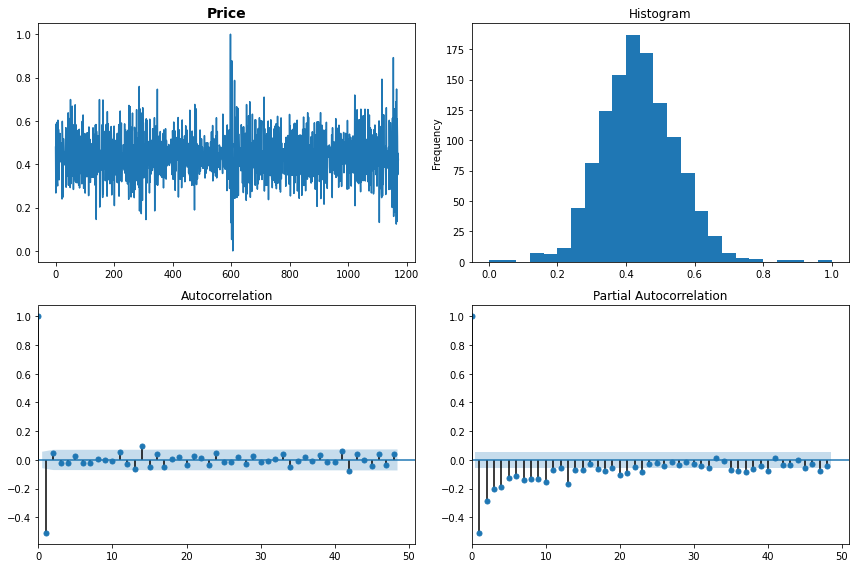

In [ ]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])


1. ADF :  -11.020209390138477
2. P-Value :  6.014180550080609e-20
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1149
5. Critical Values : 
	 1% :  -3.4360540638753405
	 5% :  -2.864058725215095
	 10% :  -2.568111031100567
--------------------------------------------
1. ADF :  -13.817858865575475
2. P-Value :  8.006606927171502e-26
3. Num Of Lags :  21
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1151
5. Critical Values : 
	 1% :  -3.436044130146462
	 5% :  -2.864054342974637
	 10% :  -2.568108697208109
--------------------------------------------
1. ADF :  -13.389635093894837
2. P-Value :  4.795959468241395e-25
3. Num Of Lags :  22
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1150
5. Critical Values : 
	 1% :  -3.4360490926821727
	 5% :  -2.8640565321870635
	 10% :  -2.5681098631379964


# **FB PROPHET**

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

In [ ]:
bc = pd.read_csv("/content/ETH-USD.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003


In [ ]:
model, forecast, future =fit_model(bc_price)

In [ ]:
future.tail()

,ds
2024,2023-05-26
2025,2023-05-27
2026,2023-05-28
2027,2023-05-29
2028,2023-05-30


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2024,2023-05-26,2926.239887,1830.661544,4034.708848
2025,2023-05-27,2928.590412,1944.430737,4064.563795
2026,2023-05-28,2934.841338,1871.694108,4000.365316
2027,2023-05-29,2929.268164,1927.012907,4090.051127
2028,2023-05-30,2937.952860,1930.889495,4024.588005


In [ ]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

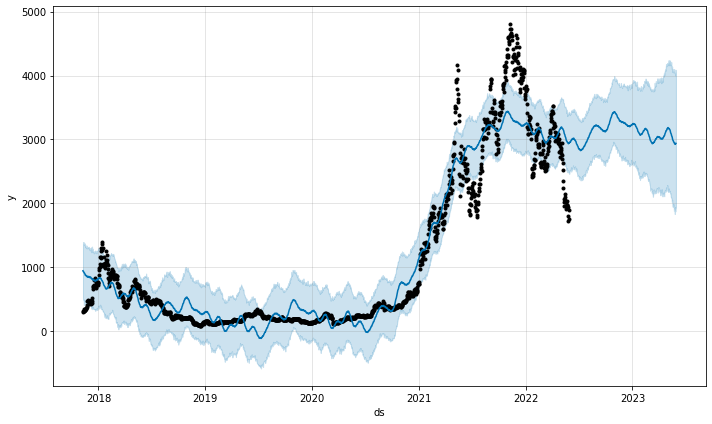

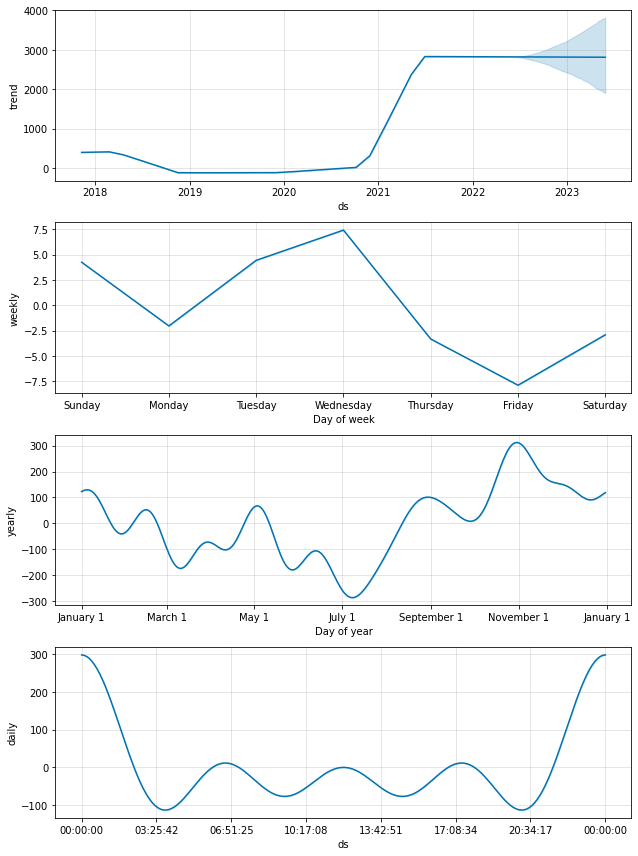

In [ ]:
fb_subplots(model, forecast)

Support Vector ***Machine***

In [ ]:
import numpy as np
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
bc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03
mean,1092.962210,1129.150308,1051.821972,1093.633214,1093.633214,1.268350e+10
std,1255.903784,1294.527504,1211.107241,1255.380748,1255.380748,1.114826e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,199.378891,205.124634,195.046211,199.517143,199.517143,3.493892e+09
50%,406.758911,418.467987,392.600189,406.657990,406.657990,9.967343e+09
75%,1916.373962,1977.108887,1819.650085,1913.915894,1913.915894,1.806592e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


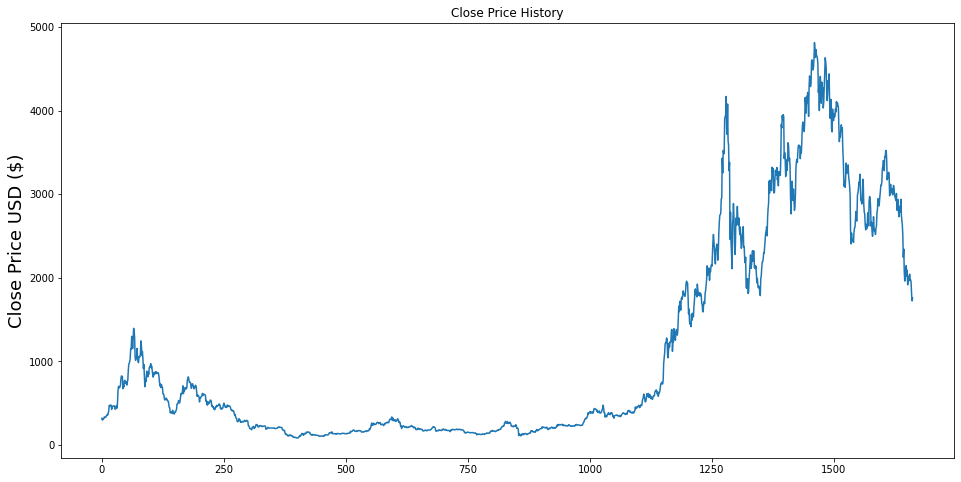

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(bc['Close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
bc = bc[['Close']]
print(bc.head())

        Close
0  320.884003
1  299.252991
2  314.681000
3  307.907990
4  316.716003


In [ ]:
forecast_out = 30
bc['Prediction'] = bc[['Close']].shift(-forecast_out)
print(bc.tail())

            Close  Prediction
1659  1803.913330         NaN
1660  1724.922852         NaN
1661  1757.941772         NaN
1662          NaN         NaN
1663  1889.420288         NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X = np.array(bc.drop(['Prediction'],1))
X = X[:-forecast_out]
print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [2936.940918]
 [2815.601807]
 [2730.186768]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
y = np.array(bc['Prediction'])
y = y[:-forecast_out]
print(y)

[ 473.502014  441.721008  515.135986 ... 1757.941772         nan
 1889.420288]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
x_forecast = np.array(bc.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[2827.756104]
 [2857.4104  ]
 [2783.476318]
 [2940.644775]
 [2749.213135]
 [2694.979736]
 [2636.093018]
 [2517.459961]
 [2245.43042 ]
 [2343.510986]
 [2072.108643]
 [1961.701538]
 [2014.418213]
 [2056.273926]
 [2145.706787]
 [2022.725952]
 [2090.40918 ]
 [1916.656128]
 [2018.336182]
 [1961.315674]
 [1974.518311]
 [2043.170166]
 [1972.181885]
 [1978.982788]
 [1944.827881]
 [1803.91333 ]
 [1724.922852]
 [1757.941772]
 [        nan]
 [1889.420288]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
import math
data = bc.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len 

1332

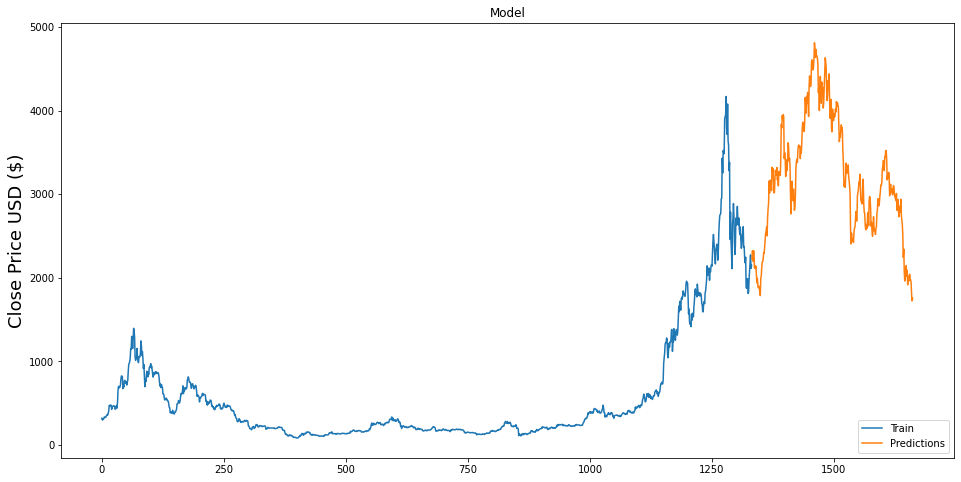

In [ ]:
train = bc[:training_data_len]
valid = bc[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()